# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
#sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw = pd.read_csv('https://raw.githubusercontent.com/lgrdcmt/ebac_modulo5/main/Tarefa1/SINASC_RO_2019.csv')

sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [3]:
sinasc2 = sinasc_raw.copy()

In [4]:
#sinasc_raw.info()

sinasc_raw.select_dtypes(include=['int64','float64']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 54 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ORIGEM      27028 non-null  int64  
 1   CODESTAB    26913 non-null  float64
 2   CODMUNNASC  27028 non-null  int64  
 3   LOCNASC     27028 non-null  int64  
 4   IDADEMAE    27028 non-null  int64  
 5   ESTCIVMAE   26711 non-null  float64
 6   CODOCUPMAE  24121 non-null  float64
 7   QTDFILVIVO  25455 non-null  float64
 8   QTDFILMORT  24930 non-null  float64
 9   CODMUNRES   27028 non-null  int64  
 10  CONSULTAS   27028 non-null  int64  
 11  HORANASC    27007 non-null  float64
 12  APGAR1      26932 non-null  float64
 13  APGAR5      26925 non-null  float64
 14  PESO        27028 non-null  int64  
 15  IDANOMAL    26437 non-null  float64
 16  NUMEROLOTE  27028 non-null  int64  
 17  DIFDATA     27028 non-null  int64  
 18  DTRECORIGA  0 non-null      float64
 19  NATURALMAE  26730 non-nul

In [5]:
sinasc2['QTDGESTANT'].value_counts()

0.0     8610
1.0     8446
2.0     4961
3.0     2177
4.0      887
5.0      359
6.0      186
7.0      101
8.0       41
9.0       25
10.0      12
12.0       3
14.0       3
11.0       2
15.0       1
13.0       1
52.0       1
Name: QTDGESTANT, dtype: int64

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [6]:
sinasc2['munResLat'].describe()

latitude = pd.cut(sinasc2['munResLat'], [-13.5, -10.5, -8.77])

latitude

0        (-13.5, -10.5]
1        (-13.5, -10.5]
2        (-13.5, -10.5]
3        (-13.5, -10.5]
4        (-13.5, -10.5]
              ...      
27023    (-13.5, -10.5]
27024    (-13.5, -10.5]
27025    (-13.5, -10.5]
27026    (-13.5, -10.5]
27027    (-13.5, -10.5]
Name: munResLat, Length: 27028, dtype: category
Categories (2, interval[float64, right]): [(-13.5, -10.5] < (-10.5, -8.77]]

In [7]:
# VAMOS USAR O CONSPRENAT e QTDGESTANT

sinasc2.pivot_table(values = ['CONSPRENAT', 'QTDGESTANT'], 
                    index = [latitude],
                    aggfunc = [sum, np.mean, min, max, np.median, 'std', 'var']
                   )

sum                  mean                   min  \
               CONSPRENAT QTDGESTANT CONSPRENAT QTDGESTANT CONSPRENAT   
munResLat                                                               
(-13.5, -10.5]   110072.0    15301.0   8.591321   1.186032        0.0   
(-10.5, -8.77]    46951.0     6876.0   8.561451   1.256120        0.0   

                                 max                median             \
               QTDGESTANT CONSPRENAT QTDGESTANT CONSPRENAT QTDGESTANT   
munResLat                                                               
(-13.5, -10.5]        0.0       99.0       15.0        8.0        1.0   
(-10.5, -8.77]        0.0       99.0       52.0        8.0        1.0   

                      std                   var             
               CONSPRENAT QTDGESTANT CONSPRENAT QTDGESTANT  
munResLat                                                   
(-13.5, -10.5]   4.243102   1.304777  18.003915   1.702444  
(-10.5, -8.77]   4.697726   1.548115  22.068629   2.396660

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [8]:
sinasc2['munResArea'].describe()

area = pd.cut(sinasc2['munResArea'], [459, 3000, 34097])

area

0        (3000, 34097]
1        (3000, 34097]
2        (3000, 34097]
3        (3000, 34097]
4        (3000, 34097]
             ...      
27023    (3000, 34097]
27024    (3000, 34097]
27025    (3000, 34097]
27026    (3000, 34097]
27027      (459, 3000]
Name: munResArea, Length: 27028, dtype: category
Categories (2, interval[int64, right]): [(459, 3000] < (3000, 34097]]

In [9]:
# VAMOS USAR O QTDPARTCES e QTDPARTNOR

sinasc2.pivot_table(values = ['QTDPARTCES', 'QTDPARTNOR'], 
                    index = [area],
                    aggfunc = [sum, np.mean, min, max, np.median, 'std', 'var']
                   )

sum                  mean                   min  \
              QTDPARTCES QTDPARTNOR QTDPARTCES QTDPARTNOR QTDPARTCES   
munResArea                                                             
(459, 3000]       2952.0     1912.0   0.572981   0.371334        0.0   
(3000, 34097]    10184.0    12659.0   0.507070   0.632982        0.0   

                                max                median             \
              QTDPARTNOR QTDPARTCES QTDPARTNOR QTDPARTCES QTDPARTNOR   
munResArea                                                             
(459, 3000]          0.0        5.0       10.0        0.0        0.0   
(3000, 34097]        0.0       12.0       41.0        0.0        0.0   

                     std                   var             
              QTDPARTCES QTDPARTNOR QTDPARTCES QTDPARTNOR  
munResArea                                                 
(459, 3000]     0.749368   0.856441   0.561553   0.733490  
(3000, 34097]   0.744981   1.278932   0.554997   1.635668

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [10]:
sinasc2['munResAlt']

altitude = pd.qcut(sinasc2['munResAlt'], 2)

altitude

0        (153.0, 595.0]
1        (153.0, 595.0]
2        (153.0, 595.0]
3        (153.0, 595.0]
4        (153.0, 595.0]
              ...      
27023    (153.0, 595.0]
27024    (153.0, 595.0]
27025    (153.0, 595.0]
27026    (153.0, 595.0]
27027    (153.0, 595.0]
Name: munResAlt, Length: 27028, dtype: category
Categories (2, interval[float64, right]): [(84.999, 153.0] < (153.0, 595.0]]

In [11]:
# VAMOS USAR SEMAGESTAC E QTDGESTANT

sinasc2.pivot_table(values = ['SEMAGESTAC', 'QTDGESTANT'],
                    index = altitude,
                    aggfunc = [sum, np.mean, min, max, np.median, 'std', 'var']
                   )

sum                  mean                   min  \
                QTDGESTANT SEMAGESTAC QTDGESTANT SEMAGESTAC QTDGESTANT   
munResAlt                                                                
(84.999, 153.0]    17826.0   493526.0   1.425738  38.568771        0.0   
(153.0, 595.0]     15090.0   501090.0   1.133564  38.566151        0.0   

                                  max                median             \
                SEMAGESTAC QTDGESTANT SEMAGESTAC QTDGESTANT SEMAGESTAC   
munResAlt                                                                
(84.999, 153.0]       21.0       52.0       45.0        1.0       39.0   
(153.0, 595.0]        19.0       12.0       45.0        1.0       39.0   

                       std                   var             
                QTDGESTANT SEMAGESTAC QTDGESTANT SEMAGESTAC  
munResAlt                                                    
(84.999, 153.0]   1.560818   2.093561   2.436154   4.383000  
(153.0, 595.0]    1.223395   1.938267   1.496696   3.756881

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

In [12]:
sinasc3 = sinasc2.set_index('munResNome')

mapping = {
    'Candeias do Jamari': 'Porto Velho',
    'Guajará-Mirim': 'Porto Velho',
    'Itapuã do Oeste': 'Porto Velho',
    'Nova Mamoré': 'Porto Velho',
    'Porto Velho': 'Porto Velho',
    'Alto Paraíso': 'Ariquemes',
    'Ariquemes': 'Ariquemes',
    'Buritis': 'Ariquemes',
    'Cacaulândia': 'Ariquemes',
    'Campo Novo de Rondônia': 'Ariquemes',
    'Cujubim': 'Ariquemes',
    'Monte Negro': 'Ariquemes',
    'Rio Crespo': 'Ariquemes',
    'Governador Jorge Teixeira': 'Jaru',
    'Jaru': 'Jaru',
    'Machadinho d''Oeste': 'Jaru',
    'Theobroma': 'Jaru',
    'Vale do Anari': 'Jaru',
    'Alvorada d''Oeste': 'Ji-Paraná',
    'Costa Marques': 'Ji-Paraná',
    'Ji-Paraná': 'Ji-Paraná',
    'Mirante da Serra': 'Ji-Paraná',
    'Nova União': 'Ji-Paraná',
    'Ouro Preto do Oeste': 'Ji-Paraná',
    'Presidente Médici': 'Ji-Paraná',
    'São Francisco do Guaporé': 'Ji-Paraná',
    'São Miguel do Guaporé': 'Ji-Paraná',
    'Seringueiras': 'Ji-Paraná',
    'Teixeirópolis': 'Ji-Paraná',
    'Urupá': 'Ji-Paraná',
    'Vale do Paraíso': 'Ji-Paraná',
    'Alta Floresta d''Oeste': 'Cacoal',
    'Alto Alegre dos Parecis': 'Cacoal',
    'Cacoal': 'Cacoal',
    'Castanheiras': 'Cacoal',
    'Espigão d''Oeste': 'Cacoal',
    'Ministro Andreazza': 'Cacoal',
    'Nova Brasilândia d''Oeste': 'Cacoal',
    'Novo Horizonte do Oeste': 'Cacoal',
    'Parecis': 'Cacoal',
    'Pimenta Bueno': 'Cacoal',
    'Primavera de Rondônia': 'Cacoal',
    'Rolim de Moura': 'Cacoal',
    'Santa Luzia d''Oeste': 'Cacoal',
    'São Felipe d''Oeste': 'Cacoal',
    'Cabixi': 'Vilhena',
    'Cerejeiras': 'Vilhena',
    'Chupinguaia': 'Vilhena',
    'Colorado do Oeste': 'Vilhena',
    'Corumbiara': 'Vilhena',
    'Pimenteiras do Oeste': 'Vilhena',
    'Vilhena': 'Vilhena'
}

sinasc3.groupby(mapping)['IDADEMAE'].mean()

munResNome
Ariquemes      25.459635
Cacoal         26.434757
Jaru           25.805579
Ji-Paraná      26.108682
Porto Velho    26.166303
Vilhena        26.417143
Name: IDADEMAE, dtype: float64

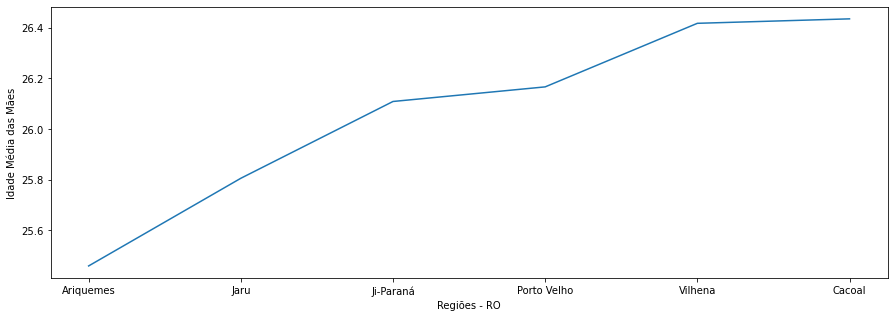

In [13]:
sinasc3.groupby(mapping)['IDADEMAE'].mean().sort_values().plot(figsize = [15,5])

plt.ylabel('Idade Média das Mães');
plt.xlabel('Regiões - RO');

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [14]:
mapping = {'Porto Velho': 'IDH-M alto', 'Vilhena': 'IDH-M alto', 'Cacoal': 'IDH-M alto', 'Ji-Paraná': 'IDH-M alto', 'Pimenta Bueno': 'IDH-M alto', 'Ariquemes': 'IDH-M alto', 'Rolim de Moura': 'IDH-M alto', 'Cerejeiras': 'IDH-M médio', 'Jaru': 'IDH-M médio', 'Colorado do Oeste': 'IDH-M médio', 'Ouro Preto do Oeste': 'IDH-M médio', 'Espigão d''Oeste': 'IDH-M médio', 'Santa Luzia d''Oeste': 'IDH-M médio', 'Pimenteiras do Oeste': 'IDH-M médio', 'Presidente Médici': 'IDH-M médio', 'Castanheiras': 'IDH-M médio', 'Guajará-Mirim': 'IDH-M médio', 'Chupinguaia': 'IDH-M médio', 'Cabixi': 'IDH-M médio', 'Candeias do Jamari': 'IDH-M médio', 'São Felipe d''Oeste': 'IDH-M médio', 'Cacaulândia': 'IDH-M médio', 'São Miguel do Guaporé': 'IDH-M médio', 'Mirante da Serra': 'IDH-M médio', 'Alvorada d''Oeste': 'IDH-M médio', 'Teixeirópolis': 'IDH-M médio', 'Nova Brasilândia d''Oeste': 'IDH-M médio', 'Rio Crespo': 'IDH-M médio', 'Primavera de Rondônia': 'IDH-M médio', 'Alta Floresta d''Oeste': 'IDH-M médio', 'Ministro Andreazza': 'IDH-M médio', 'Novo Horizonte do Oeste': 'IDH-M médio', 'Vale do Paraíso': 'IDH-M médio', 'Alto Paraíso': 'IDH-M médio', 'Parecis': 'IDH-M médio', 'Buritis': 'IDH-M médio', 'Itapuã do Oeste': 'IDH-M médio', 'Corumbiara': 'IDH-M médio', 'Cujubim': 'IDH-M médio', 'Costa Marques': 'IDH-M médio', 'São Francisco do Guaporé': 'IDH-M médio', 'Urupá': 'IDH-M médio', 'Monte Negro': 'IDH-M médio', 'Seringueiras': 'IDH-M baixo', 'Governador Jorge Teixeira': 'IDH-M baixo', 'Machadinho d''Oeste': 'IDH-M baixo', 'Campo Novo de Rondônia': 'IDH-M baixo', 'Alto Alegre dos Parecis': 'IDH-M baixo', 'Theobroma': 'IDH-M baixo', 'Nova União': 'IDH-M baixo', 'Nova Mamoré': 'IDH-M baixo', 'Vale do Anari': 'IDH-M baixo'}

sinasc3.groupby(mapping)['IDADEMAE'].mean().sort_values()

munResNome
IDH-M baixo    25.269231
IDH-M médio    25.848191
IDH-M alto     26.280332
Name: IDADEMAE, dtype: float64

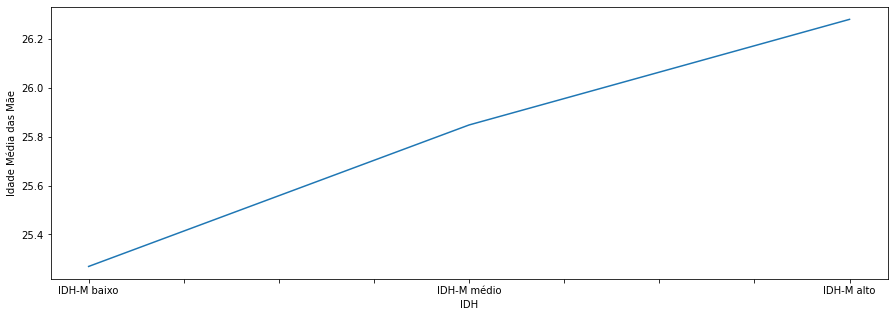

In [15]:
sinasc3.groupby(mapping)['IDADEMAE'].mean().sort_values().plot(figsize = [15,5])

plt.ylabel('Idade Média das Mãe')
plt.xlabel('IDH');

### 5.2 IFDM 
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [16]:
mapping = {'Ariquemes': 'Desenvolvimento moderado', 'Vilhena': 'Desenvolvimento moderado', 'Pimenta Bueno': 'Desenvolvimento moderado', 'Porto Velho': 'Desenvolvimento moderado', 'Ji-Paraná': 'Desenvolvimento moderado', 'Cacoal': 'Desenvolvimento moderado', 'Santa Luzia d''Oeste': 'Desenvolvimento moderado', 'Rolim de Moura': 'Desenvolvimento moderado', 'Chupinguaia': 'Desenvolvimento moderado', 'São Miguel do Guaporé': 'Desenvolvimento moderado', 'Pimenteiras do Oeste': 'Desenvolvimento moderado', 'Teixeirópolis': 'Desenvolvimento moderado', 'Colorado do Oeste': 'Desenvolvimento moderado', 'Jaru': 'Desenvolvimento moderado', 'Rio Crespo': 'Desenvolvimento moderado', 'Primavera de Rondônia': 'Desenvolvimento moderado', 'Alta Floresta d''Oeste': 'Desenvolvimento moderado', 'Ouro Preto do Oeste': 'Desenvolvimento moderado', 'São Francisco do Guaporé': 'Desenvolvimento moderado', 'Candeias do Jamari': 'Desenvolvimento moderado', 'Buritis': 'Desenvolvimento moderado', 'São Felipe d''Oeste': 'Desenvolvimento moderado', 'Presidente Médici': 'Desenvolvimento moderado', 'Cerejeiras': 'Desenvolvimento moderado', 'Monte Negro': 'Desenvolvimento moderado', 'Urupá': 'Desenvolvimento moderado', 'Espigão d''Oeste': 'Desenvolvimento regular', 'Seringueiras': 'Desenvolvimento regular', 'Alvorada d''Oeste': 'Desenvolvimento regular', 'Itapuã do Oeste': 'Desenvolvimento regular', 'Cabixi': 'Desenvolvimento regular', 'Novo Horizonte do Oeste': 'Desenvolvimento regular', 'Nova Brasilândia d''Oeste': 'Desenvolvimento regular', 'Vale do Paraíso': 'Desenvolvimento regular', 'Corumbiara': 'Desenvolvimento regular', 'Alto Paraíso': 'Desenvolvimento regular', 'Cacaulândia': 'Desenvolvimento regular', 'Vale do Anari': 'Desenvolvimento regular', 'Ministro Andreazza': 'Desenvolvimento regular', 'Costa Marques': 'Desenvolvimento regular', 'Nova União': 'Desenvolvimento regular', 'Guajará-Mirim': 'Desenvolvimento regular', 'Mirante da Serra': 'Desenvolvimento regular', 'Parecis': 'Desenvolvimento regular', 'Castanheiras': 'Desenvolvimento regular', 'Theobroma': 'Desenvolvimento regular', 'Machadinho d''Oeste': 'Desenvolvimento regular', 'Campo Novo de Rondônia': 'Desenvolvimento regular', 'Nova Mamoré': 'Desenvolvimento regular', 'Cujubim': 'Desenvolvimento regular', 'Alto Alegre dos Parecis': 'Desenvolvimento regular', 'Governador Jorge Teixeira': 'Desenvolvimento regular'}

sinasc3.groupby(mapping)['IDADEMAE'].mean().sort_values()

munResNome
Desenvolvimento regular     25.412005
Desenvolvimento moderado    26.226921
Name: IDADEMAE, dtype: float64

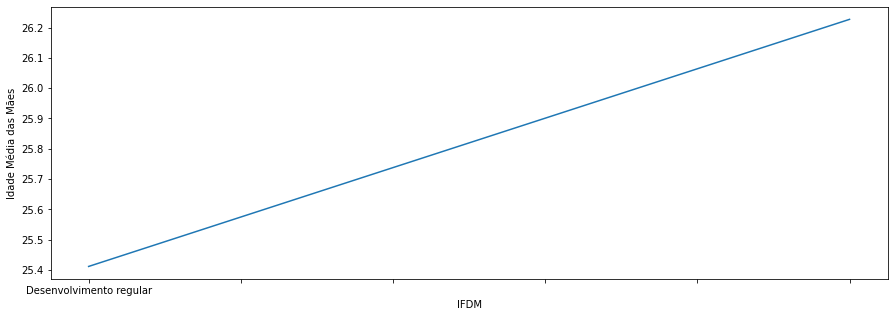

In [17]:
sinasc3.groupby(mapping)['IDADEMAE'].mean().sort_values().plot(figsize = [15,5])

plt.ylabel('Idade Média das Mães')
plt.xlabel('IFDM');

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [18]:
mapping = {'Porto Velho': 'Acima de 1 Bilhão', 'Ji-Paraná': 'Acima de 1 Bilhão', 'Vilhena': 'Acima de 1 Bilhão', 'Ariquemes': 'Acima de 1 Bilhão', 'Cacoal': 'Acima de 1 Bilhão', 'Jaru': 'Acima de 1 Bilhão', 'Rolim de Moura': 'Acima de 1 Bilhão', 'Pimenta Bueno': 'Acima de 1 Bilhão', 'Guajará-Mirim': 'Acima de 500 Milhões', 'Ouro Preto do Oeste': 'Acima de 500 Milhões', 'Buritis': 'Acima de 500 Milhões', 'Machadinho d''Oeste': 'Acima de 500 Milhões', 'Espigão d''Oeste': 'Acima de 500 Milhões', 'São Miguel do Guaporé': 'Acima de 500 Milhões', 'Candeias do Jamari': 'Acima de 500 Milhões', 'Nova Mamoré': 'Acima de 500 Milhões', 'Cerejeiras': 'Acima de 500 Milhões', 'Alta Floresta d''Oeste': 'Acima de 300 Milhões', 'Presidente Médici': 'Acima de 300 Milhões', 'Cujubim': 'Acima de 300 Milhões', 'Nova Brasilândia d''Oeste': 'Acima de 300 Milhões', 'Alto Paraíso': 'Acima de 300 Milhões', 'São Francisco do Guaporé': 'Acima de 300 Milhões', 'Colorado do Oeste': 'Acima de 300 Milhões', 'Monte Negro': 'Acima de 200 Milhões', 'Alto Alegre dos Parecis': 'Acima de 200 Milhões', 'Campo Novo de Rondônia': 'Acima de 200 Milhões', 'Alvorada d''Oeste': 'Acima de 200 Milhões', 'Chupinguaia': 'Acima de 100 Milhões', 'Corumbiara': 'Acima de 100 Milhões', 'Ministro Andreazza': 'Acima de 100 Milhões', 'Urupá': 'Acima de 100 Milhões', 'Costa Marques': 'Acima de 100 Milhões', 'Seringueiras': 'Acima de 100 Milhões', 'Mirante da Serra': 'Acima de 100 Milhões', 'Governador Jorge Teixeira': 'Acima de 100 Milhões', 'Theobroma': 'Acima de 100 Milhões', 'Santa Luzia d''Oeste': 'Acima de 100 Milhões', 'Novo Horizonte do Oeste': 'Acima de 100 Milhões', 'Itapuã do Oeste': 'Acima de 100 Milhões', 'Vale do Paraíso': 'Acima de 100 Milhões', 'Cacaulândia': 'Acima de 100 Milhões', 'Cabixi': 'Acima de 100 Milhões', 'Vale do Anari': 'Acima de 100 Milhões', 'Nova União': 'Até 100 Milhões', 'Parecis': 'Até 100 Milhões', 'Rio Crespo': 'Até 100 Milhões', 'Pimenteiras do Oeste': 'Até 100 Milhões', 'Teixeirópolis': 'Até 100 Milhões', 'São Felipe d''Oeste': 'Até 100 Milhões', 'Castanheiras': 'Até 100 Milhões', 'Primavera de Rondônia': 'Até 100 Milhões'}

sinasc3.groupby(mapping)['IDADEMAE'].mean().sort_values()

munResNome
Acima de 200 Milhões    25.146435
Acima de 100 Milhões    25.638424
Acima de 300 Milhões    25.706070
Acima de 500 Milhões    25.785927
Acima de 1 Bilhão       26.265562
Até 100 Milhões         26.519894
Name: IDADEMAE, dtype: float64

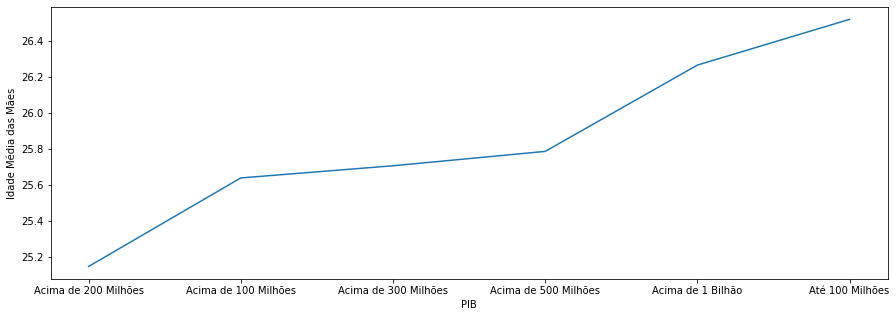

In [19]:
sinasc3.groupby(mapping)['IDADEMAE'].mean().sort_values().plot(figsize = [15,5])

plt.ylabel('Idade Média das Mães')
plt.xlabel('PIB');

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

- Descobri que quanto maior o IDH ou IFDM ter um desenvolvimento maior, a idade média das mães é maior.

- Sobre o PIB, não teve o acompanhamento igual o IDH IFDM.